In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import sleep
#%pylab notebook
%matplotlib inline
#%matplotlib tk

In [2]:
# check to see if pyusb has been installed.  If not:
# pip install pyusb
import usb

In [3]:
import seabreeze
seabreeze.use('pyseabreeze')  # using the python/usb lib not cseabreeze
import seabreeze.spectrometers as sb

In [4]:
devices = sb.list_devices()
devices

[<SeaBreezeDevice USB2000PLUS:tummy-fan>]

In [5]:
spec = sb.Spectrometer(devices[0])

In [6]:
wl = spec.wavelengths()

In [7]:
spec.integration_time_micros(1e5)

In [12]:
# collect spectra in a list of lists
spectra = []
for c in range(10):
    spectra.append(spec.intensities())
    sleep(.5)

# numpy averages a list of arrays
m = np.mean(np.array(spectra), axis=0)

In [13]:
bkg = m

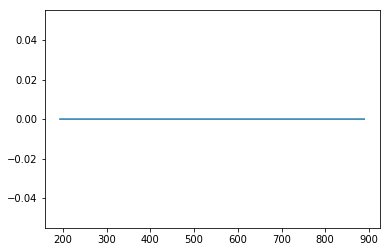

In [14]:
fig = plt.figure()
#plt.plot(wl, m, '.')
plt.plot(wl, m-bkg)
#xlim()
#plt.xlim(200, 1000)
#plt.ylim(0, m[20:].max()+(m[20:].max()*0.1))

In [16]:
df = pd.DataFrame(np.array(spectra).T, index=wl)

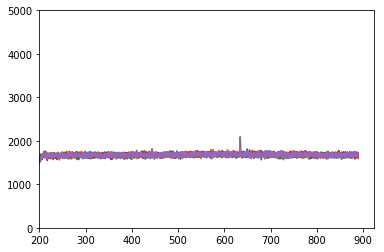

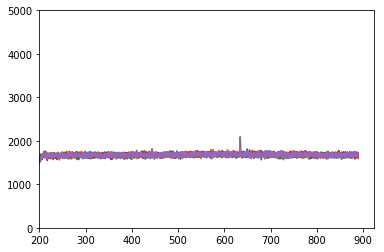

In [17]:
from IPython import display

for i in range(5):
    plt.plot(wl, spec.intensities())
    plt.xlim(200,)
    plt.ylim(0,5000)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    sleep(1)

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


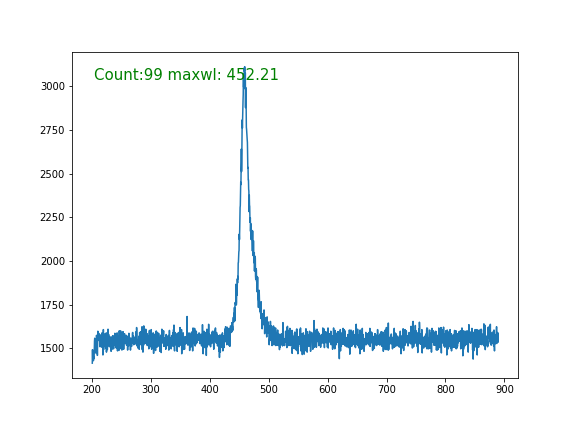

In [20]:

spec.integration_time_micros(1e4)
wl = spec.wavelengths()

fig = plt.figure(figsize=[8,6])
ax = plt.subplot(1,1,1)
plt.ion()

hot_pixels = [1235, 1303, 681, 589]
def hot_pixel_avg(intensity, hot_pixels=[]):
    if hot_pixels:
        for pixel in hot_pixels:
            pix = int(pixel)
            intensity[pix] = (intensity[pix-1]+intensity[pix+1])/2
    return intensity

def update_spectrum_plot(wl, intens, count=1):
    ax.clear()  # or plt.cla()
    y = intens[20:]
    #x = (1/(wl[20:]*1e-7))
    x = wl[20:]
    ax.plot(x,y)
    #ax.set_xlim(350,)
    #ax.set_ylim(1000, 6000)
    ax.relim()
    ax.autoscale_view()
    ax.text(0.05, 0.95, 'Count:%s maxwl: %.2f' % (count, wl[y.argmax()]),
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes, color='green', fontsize=15)
    fig.canvas.draw()
    #sleep(0.5)

count = 1
for r in range(100):
    intens = hot_pixel_avg(spec.intensities(), hot_pixels)
    update_spectrum_plot(wl, intens, r)

In [12]:
plt.close(fig)

In [15]:
spec.close()